## Yapay Zeka Yöntemleri Proje-2

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries (Veri çekmek için kullanılacak kütüphaneler)
import twint
import nest_asyncio
nest_asyncio.apply()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import emoji
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from textblob import TextBlob

# Import wordcloud
from wordcloud import WordCloud


In [3]:
# Veri temizleme,veri üzerindeki işlemler ve model eğitme için kullanılacak kütüphaneler

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Import nltk and download punkt, wordnet
import nltk

"""
nltk.download('punkt')
nltk.download('wordnet')
"""

# Import word_tokenize and stopwords from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer 


# Import the TextBlob

# Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

# We want to see whole content (non-truncated)
pd.set_option('display.max_colwidth', None)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()



from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()



from sklearn.linear_model import LogisticRegression
log=LogisticRegression()



from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
g=MultinomialNB()
b=BernoulliNB()



from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()



from xgboost import XGBClassifier
xgbc=XGBClassifier()

from sklearn.svm import SVC
svc=SVC()

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

### Veriyi Çekme ve Analiz 

In [6]:
'''
c = twint.Config()

c.Search = "\"distance learning\" OR \"online teaching\" OR \"online education\" OR \"online class\" OR \"e-learning\" "
c.Limit = 20000
c.Store_csv = True
c.Output = "onlinelearning.csv"
# Run
twint.run.Search(c)
'''
#Bu kodlar veriyi çekme aşamasında kullanılmıştır. 
#Çekilen veriler csv dosyasına kaydedildiği için kodlar yorum satırı içerisine alınmıştır.

'\nc = twint.Config()\n\nc.Search = ""distance learning" OR "online teaching" OR "online education" OR "online class" OR "e-learning" "\nc.Limit = 20000\nc.Store_csv = True\nc.Output = "onlinelearning.csv"\n# Run\ntwint.run.Search(c)\n'

In [7]:
df=pd.read_csv("onlinelearning.csv")

In [8]:
df["tweet"]

0                         Let experts handle it  Essay pay Essay due Paper pay Paper due Online class help Research  Biology Chemistry Accounting History Finance Law Biochemistry  Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted
1                         Let experts handle it  Essay pay Essay due Paper pay Paper due Online class help Research  Biology Chemistry Accounting History Finance Law Biochemistry  Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted
2                         Let experts handle it  Essay pay Essay due Paper pay Paper due Online class help Research  Biology Chemistry Accounting History Finance Law Biochemistry  Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted
3                              Hire our legit services in; #Case study #essaypay  #marketing #python #ZeroPlagiarism  Biology #Essay 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20057 entries, 0 to 20056
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20057 non-null  int64  
 1   conversation_id  20057 non-null  int64  
 2   created_at       20057 non-null  object 
 3   date             20057 non-null  object 
 4   time             20057 non-null  object 
 5   timezone         20057 non-null  int64  
 6   user_id          20057 non-null  int64  
 7   username         20057 non-null  object 
 8   name             20057 non-null  object 
 9   place            3 non-null      object 
 10  tweet            20057 non-null  object 
 11  language         20057 non-null  object 
 12  mentions         20057 non-null  object 
 13  urls             20057 non-null  object 
 14  photos           20057 non-null  object 
 15  replies_count    20057 non-null  int64  
 16  retweets_count   20057 non-null  int64  
 17  likes_count 

In [10]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,2.005700e+04,2.005700e+04,20057.0,2.005700e+04,20057.000000,20057.000000,20057.000000,20057.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.409255e+18,1.408989e+18,300.0,1.020241e+18,0.345864,0.958718,2.586828,0.158598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.330623e+14,8.973690e+15,0.0,5.210188e+17,1.496801,28.706192,64.057378,0.365310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.408457e+18,5.408493e+17,300.0,3.162300e+04,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.408862e+18,1.408844e+18,300.0,9.028702e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.409300e+18,1.409275e+18,300.0,1.293832e+18,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.409606e+18,1.409592e+18,300.0,1.368629e+18,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.409918e+18,1.409918e+18,300.0,1.409910e+18,100.000000,3809.000000,7886.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove punctiations

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
new_words=("online", "class", "course", "learning", "learn","teach", "teaching", "distance", \
               "distancelearning", "education", "teacher", "student", "grade", "classes", "computer", "resource", \
               "onlineeducation", "onlinelearning", "school", "students", "class", "virtual", "eschool", "thing", \
               "virtuallearning", "educated", "educates", "teaches", "studies", "study", "semester", "elearning", \
               "teachers", "lecturer", "lecture", "amp", "academic", "admission", "academician", "account", "action",\
               "add", "app", "announcement", "application", "adult", "classroom", "system", "video", "essay", "training", \
               "homework","work","assignment", "paper", "get", "math", "project", "science", "physics", "lesson", "schools", \
               "courses", "assignments", "know", "instruction","email", "discussion","home", "college", "exam", "university", \
               "use", "fall", "term", "proposal", "one", "review", "proposal", "calculus", "search", "research", "algebra", \
               "internet", "remote", "remotelearning","someone"
              )
for i in new_words:
    stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punct(text):
    
    text = re.sub('@[\w]+','',text)
    text = re.sub(r'https:\/\/\S+', '', text) #remove links
    text = re.sub(r'#', '', text) #remove hashtags
    text = re.sub(r'RT[\s]+', '', text) #remove retweets
  
    text=text.encode("ascii", "ignore") #ignore unicode characters
    text=text.decode()
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text=re.sub(emoji.get_emoji_regexp(),r"",text) #remove emojis
    text = text.lower()
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
   
    return text

df['tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df[['tweet','tweet_punct']]

,tweet,tweet_punct
0,Let experts handle it Essay pay Essay due Paper pay Paper due Online class help Research Biology Chemistry Accounting History Finance Law Biochemistry Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted,let experts handle it essay pay essay due paper pay paper due online class help research biology chemistry accounting history finance law biochemistry psychology thesis dissertations assignment due political science geometry dm the prompt
1,Let experts handle it Essay pay Essay due Paper pay Paper due Online class help Research Biology Chemistry Accounting History Finance Law Biochemistry Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted,let experts handle it essay pay essay due paper pay paper due online class help research biology chemistry accounting history finance law biochemistry psychology thesis dissertations assignment due political science geometry dm the prompt
2,Let experts handle it Essay pay Essay due Paper pay Paper due Online class help Research Biology Chemistry Accounting History Finance Law Biochemistry Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted,let experts handle it essay pay essay due paper pay paper due online class help research biology chemistry accounting history finance law biochemistry psychology thesis dissertations assignment due political science geometry dm the prompt
3,Hire our legit services in; #Case study #essaypay #marketing #python #ZeroPlagiarism Biology #Essay due #Someone help homework #Chemistry #history #Econometrics #Math #Chemistry #Paper pay #chicagoessays #Paper write #English #Online class #Assignment.,hire our legit services in case study essaypay marketing python zeroplagiarism biology essay due someone help homework chemistry history econometrics math chemistry paper pay chicagoessays paper write english online class assignment
4,pay us to help you with; Group #discussion posts #Math hw #excel #Project #Essay due #Pay write #English #Paper pay #Someone help paper #Case study #quiz #Do my homework #Online class #Histo #book review #Assignment due #Chemistry #physics #history #geology @Online_Klas,pay us to help you with group discussion posts math hw excel project essay due pay write english paper pay someone help paper case study quiz do my homework online class histo book review assignment due chemistry physics history geology
...,...,...
20052,🔶 ATENCIÓN VECINOS‼️Nuevo proceso de inscripción para el curso e-learning 💻de Formulación de Proyecto para el Liderazgo Social 👩🏻‍🦱👨🏽‍🦱💪🏼.👉🏼Las clases inician el próximo lunes 02 de agosto 📌y se podrán inscribir hasta el domingo 18 de julio 2021. https://t.co/zZ1ylNDx51,atencin vecinosnuevo proceso de inscripcin para el curso elearning de formulacin de proyecto para el liderazgo social las clases inician el prximo lunes de agosto y se podrn inscribir hasta el domingo de julio
20053,Expert Homework Help✓ Math Algebra Calculus Statistics Accounting Essay due Assignment Online class test/quiz dissertation Project econometrics Finance Biology Physics Excel thesis Project Summer class https://t.co/Qp9vYrM7BT Email elitepages10@gmail.com,expert homework help math algebra calculus statistics accounting essay due assignment online class testquiz dissertation project econometrics finance biology physics excel thesis project summer class email elitepagescom
20054,"A Project is structured under 4 major levels, 3 of which represent the Project Management team and a fourth that sits outside the project: Corporate, Programme Management or the customer. Learn more in this video: https://t.co/WgDT8Nfpe7 @PRINCE2Publish @AXELOS_GBP @PeopleCert",a project is structured under major levels of which represent the project management team and a fourth that sits outside the project corporate programme management or the customer learn more in this video
20055,The

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
df['tweet_punct'] = df['tweet_punct'].apply(lambda x: remove_stopwords(x))

In [14]:
df['tweet_punct'] = df['tweet_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [15]:
df = df.dropna(axis=1) #drop all columns with missing values
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,tweet_punct
0,1409917807479996418,1409917803008757760,2021-06-29 19:52:54 Türkiye Standart Saati,2021-06-29,19:52:54,300,1357269407572066304,writers_trusted,ONLINE CLASS HELPERS +1(435)518-4913,Let experts handle it Essay pay Essay due Paper pay Paper due Online class help Research Biology Chemistry Accounting History Finance Law Biochemistry Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted,...,1,0,0,[],[],https://twitter.com/writers_trusted/status/1409917807479996418,False,0,[],let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt
1,1409917805223415819,1409917803008757760,2021-06-29 19:52:54 Türkiye Standart Saati,2021-06-29,19:52:54,300,1357269407572066304,writers_trusted,ONLINE CLASS HELPERS +1(435)518-4913,Let experts handle it Essay pay Essay due Paper pay Paper due Online class help Research Biology Chemistry Accounting History Finance Law Biochemistry Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted,...,1,0,0,[],[],https://twitter.com/writers_trusted/status/1409917805223415819,False,0,[],let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt
2,1409917803008757760,1409917803008757760,2021-06-29 19:52:53 Türkiye Standart Saati,2021-06-29,19:52:53,300,1357269407572066304,writers_trusted,ONLINE CLASS HELPERS +1(435)518-4913,Let experts handle it Essay pay Essay due Paper pay Paper due Online class help Research Biology Chemistry Accounting History Finance Law Biochemistry Psychology Thesis Dissertations ... Assignment due Political science Geometry Dm the prompt @writers_trusted,...,1,0,0,[],[],https://twitter.com/writers_trusted/status/1409917803008757760,False,0,[],let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt
3,1409917766954536961,1409917766954536961,2021-06-29 19:52:45 Türkiye Standart Saati,2021-06-29,19:52:45,300,937683488530161664,excellentgrader,Excellent Graders,Hire our legit services in; #Case study #essaypay #marketing #python #ZeroPlagiarism Biology #Essay due #Someone help homework #Chemistry #history #Econometrics #Math #Chemistry #Paper pay #chicagoessays #Paper write #English #Online class #Assignment.,...,0,1,0,"['case', 'essaypay', 'marketing', 'python', 'zeroplagiarism', 'essay', 'someone', 'chemistry', 'history', 'econometrics', 'math', 'chemistry', 'paper', 'chicagoessays', 'paper', 'english', 'online', 'assignment']",[],https://twitter.com/ExcellentGrader/status/1409917766954536961,False,0,[],hire legit services case essaypay marketing python zeroplagiarism biology due help chemistry history econometrics chemistry pay chicagoessays write english
4,1409917746553442306,1409917746553442306,2021-06-29 19:52:40 Türkiye Standart Saati,2021-06-29,19:52:40,300,3291790006,online_klas,"Val Essays, Exam, Online Class, Research,Thesis",pay us to help you with; Group #discussion posts #Math hw #excel #Project #Essay due #Pay write #English #Paper pay #Someone help paper #Case study #quiz #Do my homework #Online class #Histo #book review #Assignment due #Chemistry #physics #history #geology @Online_Klas,...,0,0,0,"['discussion', 'math', 'excel', 'project', 'essay', 'pay', 'english', 'paper', 'someone', 'case', 'quiz', 'do', 'online', 'histo', 'book', 'assignment', 'chemistry', 'physics', 'history', 'geology']",[],https://twitter.com/Online_Klas/status/1409917746553442306,False,0,[],pay us help group posts hw excel due pay write english pay help case quiz histo book due chemistry history geolo

In [16]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to', 'tweet_punct'],
      dtype='object')

In [17]:
df_clean=df[['tweet_punct','date','retweets_count','likes_count']] # location ekle
df_clean

,tweet_punct,date,retweets_count,likes_count
0,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0
1,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0
2,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0
3,hire legit services case essaypay marketing python zeroplagiarism biology due help chemistry history econometrics chemistry pay chicagoessays write english,2021-06-29,1,0
4,pay us help group posts hw excel due pay write english pay help case quiz histo book due chemistry history geology,2021-06-29,0,0
...,...,...,...,...
20052,atencin vecinosnuevo proceso de inscripcin para el curso de formulacin de proyecto para el liderazgo social las clases inician el prximo lunes de agosto se podrn inscribir hasta el domingo de julio,2021-06-25,11,14
20053,expert help statistics accounting due testquiz dissertation econometrics finance biology excel thesis summer elitepagescom,2021-06-25,0,0
20054,structured major levels represent management team fourth sits outside corporate programme management customer,2021-06-25,0,0
20055,two democratic amendments schwiebert fund person lieberman boost overall per funding hundred,2021-06-25,1,4


## Sentiment Analysis 

In [18]:

# Add polarities and subkectivities into the DataFrame by using TextBlob
df_clean["Polarity"] = df_clean["tweet_punct"].apply(lambda word: TextBlob(word).sentiment.polarity)
df_clean["Subjectivity"] = df_clean["tweet_punct"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

# Display the Polarity and Subjectivity columns
display(df_clean[["Polarity","Subjectivity"]].head(10))

,Polarity,Subjectivity
0,-0.093750,0.30625
1,-0.093750,0.30625
2,-0.093750,0.30625
3,-0.062500,0.18750
4,-0.083333,0.25000
5,0.000000,0.00000
6,-0.062500,0.18750
7,-0.062500,0.18750
8,-0.062500,0.18750
9,-0.062500,0.18750


In [19]:
# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
df_clean["Sentiment"] = df_clean["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(df_clean[["Sentiment"]].head(10))

,Sentiment
0,Negative
1,Negative
2,Negative
3,Negative
4,Negative
5,Neutral
6,Negative
7,Negative
8,Negative
9,Negative


In [20]:
df_clean.head()

,tweet_punct,date,retweets_count,likes_count,Polarity,Subjectivity,Sentiment
0,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0,-0.093750,0.30625,Negative
1,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0,-0.093750,0.30625,Negative
2,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0,-0.093750,0.30625,Negative
3,hire legit services case essaypay marketing python zeroplagiarism biology due help chemistry history econometrics chemistry pay chicagoessays write english,2021-06-29,1,0,-0.062500,0.18750,Negative
4,pay us help group posts hw excel due pay write english pay help case quiz histo book due chemistry history geology,2021-06-29,0,0,-0.083333,0.25000,Negative


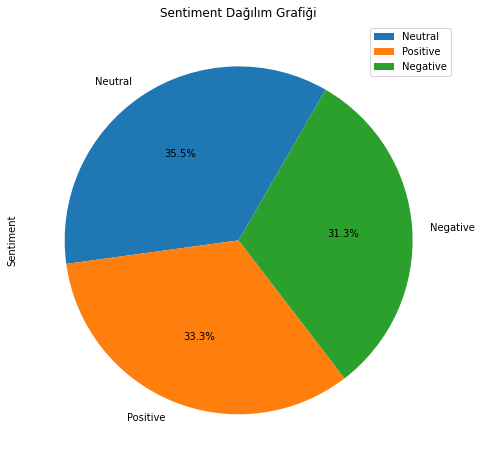

In [21]:
plt.figure(figsize=(8,8))
df_clean['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Sentiment Dağılım Grafiği')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Sentiment Dağılım Grafiği')

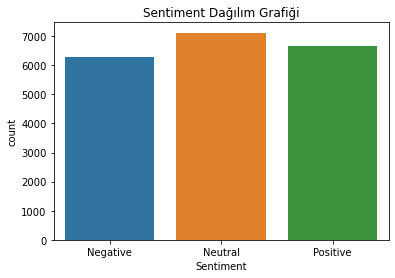

In [22]:
sns.countplot(df_clean['Sentiment'])
plt.title("Sentiment Dağılım Grafiği")

## Generating Word Cloud

In [23]:
from wordcloud import WordCloud

wc = WordCloud( background_color="white", colormap="Dark2",
max_font_size=150, random_state=42)

In [24]:
text_positive=df_clean[df_clean['Sentiment']=="Positive"]
text_positive

,tweet_punct,date,retweets_count,likes_count,Polarity,Subjectivity,Sentiment
13,hello offer best services affordable prices pay due pay essays pay pay tuotors pay maths pay biology pay chemistry pay history pay geography pay pay procurement pay hrm,2021-06-29,0,0,0.437500,0.337500,Positive
14,welp gonna take nap yall entertaining bangtan distracting hr try stay awake,2021-06-29,0,0,0.500000,0.700000,Positive
18,reading shifting balance summer highly recommend dig much deeper simple meaningful ways adjust support success reading thesixshifts,2021-06-29,0,1,0.232000,0.319429,Positive
21,excellent grades quaranteed us biology lab report chemistry literature powerpoint history excel philosophy geometry philosophy dm asap,2021-06-29,0,0,1.000000,1.000000,Positive
24,hire professional ace essays pay pay pay pay statistics pay accounting pay literature history psychology dm us,2021-06-29,0,0,0.100000,0.100000,Positive
...,...,...,...,...,...,...,...
20037,client satisfaction first priority assignmentdue python javascript chemistry essayhelp daysofcode essaypay geology pay write womenwhocode devcommunity nodejs dm,2021-06-25,5,1,0.250000,0.333333,Positive
20047,weekly workout sessions boyfriend say hes proud ive keeping hes proud makes feel happy validate mooooore,2021-06-25,0,6,0.800000,1.000000,Positive
20050,sustainability value creation new provide insights value creation integration sustainable business model earn cpe credits free member benefit,2021-06-25,0,0,0.268182,0.627273,Positive
20052,atencin vecinosnuevo proceso de inscripcin para el curso de formulacin de proyecto para el liderazgo social las clases inician el prximo lunes de agosto se podrn inscribir hasta el domingo de julio,2021-06-25,11,14,0.033333,0.066667,Positive


In [25]:
text_positive_review = " ".join(review for review in text_positive.tweet_punct) # tüm tweetleri birleştirerek tek bir metin elde ettik
text_positive_review

'hello offer best services affordable prices pay due pay essays pay pay tuotors pay maths pay biology pay chemistry pay history pay geography pay pay procurement pay hrm welp gonna take nap yall entertaining bangtan distracting hr try stay awake reading shifting balance summer highly recommend dig much deeper simple meaningful ways adjust support success reading thesixshifts excellent grades quaranteed us biology lab report chemistry literature powerpoint history excel philosophy geometry philosophy dm asap hire professional ace essays pay pay pay pay statistics pay accounting pay literature history psychology dm us love really love long bath tiring day like bahalag midnight na others say unhealthy daw pero satisfying man gud sya huhu sorry na hire professional ace essays pay pay pay pay statistics pay accounting biology pay literature history psychology dm us pay us quiz final hw biology psychology pre chemistry philosophy nursing history stats ethic business social information tech p

In [26]:
text_negative=df_clean[df_clean['Sentiment']=="Negative"]
text_negative

,tweet_punct,date,retweets_count,likes_count,Polarity,Subjectivity,Sentiment
0,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0,-0.093750,0.306250,Negative
1,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0,-0.093750,0.306250,Negative
2,let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt,2021-06-29,0,0,-0.093750,0.306250,Negative
3,hire legit services case essaypay marketing python zeroplagiarism biology due help chemistry history econometrics chemistry pay chicagoessays write english,2021-06-29,1,0,-0.062500,0.187500,Negative
4,pay us help group posts hw excel due pay write english pay help case quiz histo book due chemistry history geology,2021-06-29,0,0,-0.083333,0.250000,Negative
...,...,...,...,...,...,...,...
20043,statistics accounting due testquiz dissertation econometrics finance biology excel thesis,2021-06-25,0,0,-0.125000,0.375000,Negative
20046,allow us professionally handle essays due chemistry history pay projects powerpoint pay write due,2021-06-25,0,0,-0.050000,0.283333,Negative
20048,allow us professionally handle essays due chemistry history pay projects powerpoint pay write due,2021-06-25,0,0,-0.050000,0.283333,Negative
20051,expert help statistics accounting due testquiz dissertation econometrics finance biology excel,2021-06-25,0,0,-0.125000,0.375000,Negative


In [27]:
text_negative_review = " ".join(review for review in text_negative.tweet_punct) # tüm tweetleri birleştirerek tek bir metin elde ettik
text_negative_review

'let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt hire legit services case essaypay marketing python zeroplagiarism biology due help chemistry history econometrics chemistry pay chicagoessays write english pay us help group posts hw excel due pay write english pay help case quiz histo book due chemistry history geology experts whatsapp literature biology chemistry law psychology pay business law due history american history economics experts whatsapp literature biology chemistry law psychology pay business law due history american history eco

In [28]:
from PIL import Image

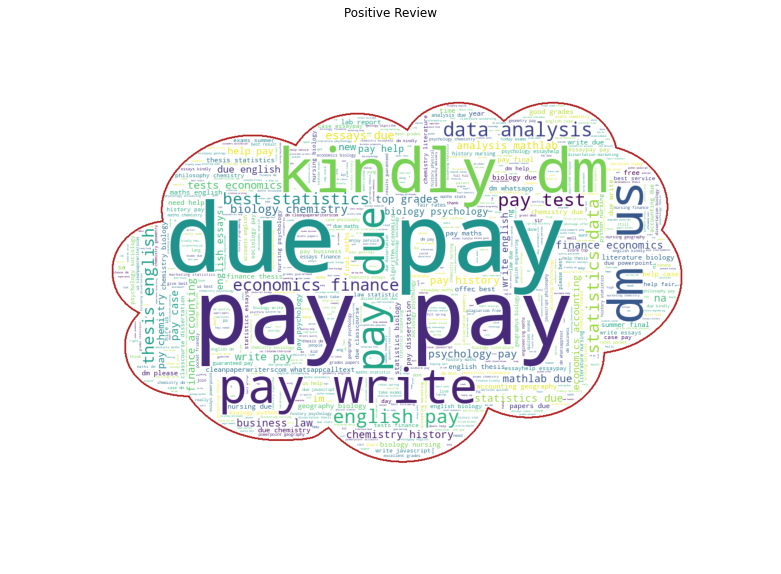

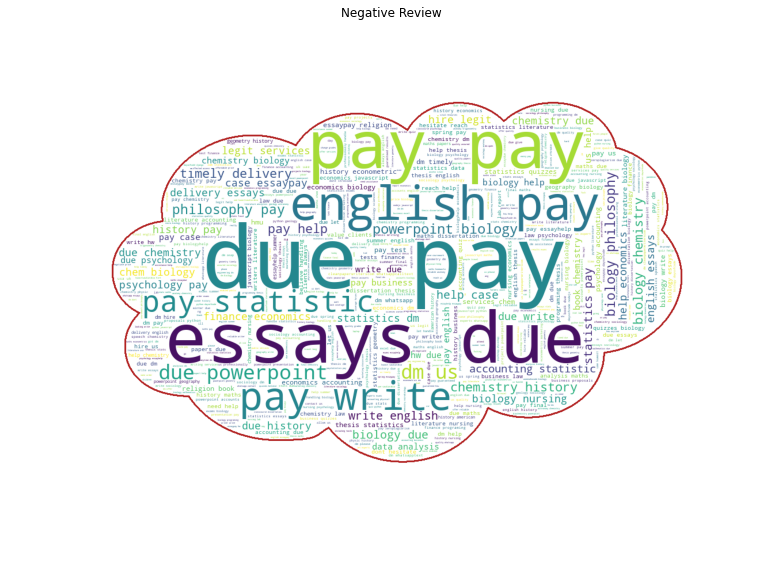

In [29]:
cloud_mask = np.array(Image.open("cloud.png"))# word cloud'un şeklini ayarlıyor
wc = WordCloud(background_color="white", max_words=1000, mask=cloud_mask,
contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text_positive_review)

# store to file
wc.to_file("cloud2.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis("off")
plt.title('Positive Review')
plt.show()




# Generate a wordcloud
wc.generate(text_negative_review)



# store to file
wc.to_file("cloud3.png")



# show
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis("off")
plt.title('Negative Review')
plt.show()

In [30]:
# Ara rapordan sonra tweetleri daha doğru analiz edebilmek için gereksiz kelimeleri stopwords kullanarak çıkardık
#bu nedenle word cloud'da değişiklik oldu.

# Tokenization

In [31]:
def tokenization(text): # Tokenize işlemi ile cümle kelimelerine ayrılır.
    text = re.split('\W+', text)
    return text

df_clean['Tweet_tokenized'] = df_clean['tweet_punct'].apply(lambda x: tokenization(x.lower())) 
df_clean[['Tweet_tokenized','tweet_punct']]
# tweetlerin tokinize işleminden sonraki hali Tweet_tokenized sütununda tutulur.  

,Tweet_tokenized,tweet_punct
0,"[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]",let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt
1,"[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]",let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt
2,"[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]",let experts handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertations due political geometry dm prompt
3,"[hire, legit, services, case, essaypay, marketing, python, zeroplagiarism, biology, due, help, chemistry, history, econometrics, chemistry, pay, chicagoessays, write, english]",hire legit services case essaypay marketing python zeroplagiarism biology due help chemistry history econometrics chemistry pay chicagoessays write english
4,"[pay, us, help, group, posts, hw, excel, due, pay, write, english, pay, help, case, quiz, histo, book, due, chemistry, history, geology]",pay us help group posts hw excel due pay write english pay help case quiz histo book due chemistry history geology
...,...,...
20052,"[atencin, vecinosnuevo, proceso, de, inscripcin, para, el, curso, de, formulacin, de, proyecto, para, el, liderazgo, social, las, clases, inician, el, prximo, lunes, de, agosto, se, podrn, inscribir, hasta, el, domingo, de, julio]",atencin vecinosnuevo proceso de inscripcin para el curso de formulacin de proyecto para el liderazgo social las clases inician el prximo lunes de agosto se podrn inscribir hasta el domingo de julio
20053,"[expert, help, statistics, accounting, due, testquiz, dissertation, econometrics, finance, biology, excel, thesis, summer, elitepagescom]",expert help statistics accounting due testquiz dissertation econometrics finance biology excel thesis summer elitepagescom
20054,"[structured, major, levels, represent, management, team, fourth, sits, outside, corporate, programme, management, customer]",structured major levels represent management team fourth sits outside corporate programme management customer
20055,"[two, democratic, amendments, schwiebert, fund, person, lieberman, boost, overall, per, funding, hundred]",two democratic amendments schwiebert fund person lieberman boost overall per funding hundred


# Stemming and Lemmatization

In [32]:
from nltk.stem import PorterStemmer #kütüphaneler import edildi
stemmerporter=PorterStemmer()
import nltk
from nltk.stem import WordNetLemmatizer

In [33]:
'''
from textblob import TextBlob, Word

# Lemmatize a word
word = 'stripes'
#w = Word(word)
#w.lemmatize()
df_clean['lemma_text'] = df_clean['Tweet_tokenized'].apply(lambda x:[Word(j).lemmatize() for j in x] )
df_clean[['lemma_text','Tweet_tokenized']]
#> stripe
'''
# Textblob kullanılarak yapılan lemmatize işlemi yukarıda yer almaktadır
#WordNetLemmatizer() Kullanılarak yapılan lemmatize işlemi daha başarılı sonuç vermiştir.
#Bu nedenle textblob kullanılan kısım deneysel çalışmada kullanılmış, sonrasında ise yorum satırına alınmıştır

"\nfrom textblob import TextBlob, Word\n\n# Lemmatize a word\nword = 'stripes'\n#w = Word(word)\n#w.lemmatize()\ndf_clean['lemma_text'] = df_clean['Tweet_tokenized'].apply(lambda x:[Word(j).lemmatize() for j in x] )\ndf_clean[['lemma_text','Tweet_tokenized']]\n#> stripe\n"

In [34]:
ps = nltk.PorterStemmer()

def stemming(text): # Stemma ile kelimelerin kökünü bulduk ve Tweet_stemmed sütununu oluşturup stemmed halini buraya koyduk.
    text = [ps.stem(word) for word in text]
    return text

df_clean['Tweet_stemmed'] = df_clean['Tweet_tokenized'].apply(lambda x: stemming(x))   
df_clean[['Tweet_stemmed','Tweet_tokenized']]

,Tweet_stemmed,Tweet_tokenized
0,"[let, expert, handl, pay, due, pay, due, help, biolog, chemistri, account, histori, financ, law, biochemistri, psycholog, thesi, dissert, due, polit, geometri, dm, prompt]","[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]"
1,"[let, expert, handl, pay, due, pay, due, help, biolog, chemistri, account, histori, financ, law, biochemistri, psycholog, thesi, dissert, due, polit, geometri, dm, prompt]","[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]"
2,"[let, expert, handl, pay, due, pay, due, help, biolog, chemistri, account, histori, financ, law, biochemistri, psycholog, thesi, dissert, due, polit, geometri, dm, prompt]","[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]"
3,"[hire, legit, servic, case, essaypay, market, python, zeroplagiar, biolog, due, help, chemistri, histori, econometr, chemistri, pay, chicagoessay, write, english]","[hire, legit, services, case, essaypay, marketing, python, zeroplagiarism, biology, due, help, chemistry, history, econometrics, chemistry, pay, chicagoessays, write, english]"
4,"[pay, us, help, group, post, hw, excel, due, pay, write, english, pay, help, case, quiz, histo, book, due, chemistri, histori, geolog]","[pay, us, help, group, posts, hw, excel, due, pay, write, english, pay, help, case, quiz, histo, book, due, chemistry, history, geology]"
...,...,...
20052,"[atencin, vecinosnuevo, proceso, de, inscripcin, para, el, curso, de, formulacin, de, proyecto, para, el, liderazgo, social, la, clase, inician, el, prximo, lune, de, agosto, se, podrn, inscribir, hasta, el, domingo, de, julio]","[atencin, vecinosnuevo, proceso, de, inscripcin, para, el, curso, de, formulacin, de, proyecto, para, el, liderazgo, social, las, clases, inician, el, prximo, lunes, de, agosto, se, podrn, inscribir, hasta, el, domingo, de, julio]"
20053,"[expert, help, statist, account, due, testquiz, dissert, econometr, financ, biolog, excel, thesi, summer, elitepagescom]","[expert, help, statistics, accounting, due, testquiz, dissertation, econometrics, finance, biology, excel, thesis, summer, elitepagescom]"
20054,"[structur, major, level, repres, manag, team, fourth, sit, outsid, corpor, programm, manag, custom]","[structured, major, levels, represent, management, team, fourth, sits, outside, corporate, programme, management, customer]"
20055,"[two, democrat, amend, schwiebert, fund, person, lieberman, boost, overal, per, fund, hundr]","[two, democratic, amendments, schwiebert, fund, person, lieberman, boost, overall, per, funding, hundred]"


In [35]:
lemmetizer_output= WordNetLemmatizer() # lemma işlemi uygulanarak kelime kelime ayırdık ve lemmatize edilmiş kelimeleri lemma_text sütununa atadık.

df_clean['lemma_text'] = df_clean['Tweet_tokenized'].apply(lambda x:[lemmetizer_output.lemmatize(j) for j in x] )
df_clean[['lemma_text','Tweet_tokenized']]

,lemma_text,Tweet_tokenized
0,"[let, expert, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertation, due, political, geometry, dm, prompt]","[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]"
1,"[let, expert, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertation, due, political, geometry, dm, prompt]","[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]"
2,"[let, expert, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertation, due, political, geometry, dm, prompt]","[let, experts, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertations, due, political, geometry, dm, prompt]"
3,"[hire, legit, service, case, essaypay, marketing, python, zeroplagiarism, biology, due, help, chemistry, history, econometrics, chemistry, pay, chicagoessays, write, english]","[hire, legit, services, case, essaypay, marketing, python, zeroplagiarism, biology, due, help, chemistry, history, econometrics, chemistry, pay, chicagoessays, write, english]"
4,"[pay, u, help, group, post, hw, excel, due, pay, write, english, pay, help, case, quiz, histo, book, due, chemistry, history, geology]","[pay, us, help, group, posts, hw, excel, due, pay, write, english, pay, help, case, quiz, histo, book, due, chemistry, history, geology]"
...,...,...
20052,"[atencin, vecinosnuevo, proceso, de, inscripcin, para, el, curso, de, formulacin, de, proyecto, para, el, liderazgo, social, la, clases, inician, el, prximo, lunes, de, agosto, se, podrn, inscribir, hasta, el, domingo, de, julio]","[atencin, vecinosnuevo, proceso, de, inscripcin, para, el, curso, de, formulacin, de, proyecto, para, el, liderazgo, social, las, clases, inician, el, prximo, lunes, de, agosto, se, podrn, inscribir, hasta, el, domingo, de, julio]"
20053,"[expert, help, statistic, accounting, due, testquiz, dissertation, econometrics, finance, biology, excel, thesis, summer, elitepagescom]","[expert, help, statistics, accounting, due, testquiz, dissertation, econometrics, finance, biology, excel, thesis, summer, elitepagescom]"
20054,"[structured, major, level, represent, management, team, fourth, sits, outside, corporate, programme, management, customer]","[structured, major, levels, represent, management, team, fourth, sits, outside, corporate, programme, management, customer]"
20055,"[two, democratic, amendment, schwiebert, fund, person, lieberman, boost, overall, per, funding, hundred]","[two, democratic, amendments, schwiebert, fund, person, lieberman, boost, overall, per, funding, hundred]"


In [36]:
def clean_text(text): # stemma ve lemma işleminden sonra ayrılmış kelimeleri join kullanarak tekrar birleştiren method.
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove punctuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens ]  # remove stopwords and stemming
    return text

In [37]:
df_clean['cleaned_text'] = df_clean['lemma_text'].apply(lambda x: ' '.join(x) ) # lemma işlemiyle ayırdığımız verileri join ile birleştirdik
df_clean[['cleaned_text','lemma_text']]

,cleaned_text,lemma_text
0,let expert handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertation due political geometry dm prompt,"[let, expert, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertation, due, political, geometry, dm, prompt]"
1,let expert handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertation due political geometry dm prompt,"[let, expert, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertation, due, political, geometry, dm, prompt]"
2,let expert handle pay due pay due help biology chemistry accounting history finance law biochemistry psychology thesis dissertation due political geometry dm prompt,"[let, expert, handle, pay, due, pay, due, help, biology, chemistry, accounting, history, finance, law, biochemistry, psychology, thesis, dissertation, due, political, geometry, dm, prompt]"
3,hire legit service case essaypay marketing python zeroplagiarism biology due help chemistry history econometrics chemistry pay chicagoessays write english,"[hire, legit, service, case, essaypay, marketing, python, zeroplagiarism, biology, due, help, chemistry, history, econometrics, chemistry, pay, chicagoessays, write, english]"
4,pay u help group post hw excel due pay write english pay help case quiz histo book due chemistry history geology,"[pay, u, help, group, post, hw, excel, due, pay, write, english, pay, help, case, quiz, histo, book, due, chemistry, history, geology]"
...,...,...
20052,atencin vecinosnuevo proceso de inscripcin para el curso de formulacin de proyecto para el liderazgo social la clases inician el prximo lunes de agosto se podrn inscribir hasta el domingo de julio,"[atencin, vecinosnuevo, proceso, de, inscripcin, para, el, curso, de, formulacin, de, proyecto, para, el, liderazgo, social, la, clases, inician, el, prximo, lunes, de, agosto, se, podrn, inscribir, hasta, el, domingo, de, julio]"
20053,expert help statistic accounting due testquiz dissertation econometrics finance biology excel thesis summer elitepagescom,"[expert, help, statistic, accounting, due, testquiz, dissertation, econometrics, finance, biology, excel, thesis, summer, elitepagescom]"
20054,structured major level represent management team fourth sits outside corporate programme management customer,"[structured, major, level, represent, management, team, fourth, sits, outside, corporate, programme, management, customer]"
20055,two democratic amendment schwiebert fund person lieberman boost overall per funding hundred,"[two, democratic, amendment, schwiebert, fund, person, lieberman, boost, overall, per, funding, hundred]"


In [38]:
x=df_clean.cleaned_text #text sütunu x oluyor
y=df_clean['Sentiment'] #dataframein stars sütunu y oluyor
print(x.shape)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42,stratify = y)

(20057,)


# Vectorization

In [39]:
# Categorik verileri makine öğrenmesi modeline doğrudan veremediğimiz için veriler üzerinde vectorize işlemi uygulandı ve modele vermek için hazır hale getirildi

In [40]:
vect = CountVectorizer(lowercase=True, stop_words='english')
x_train_dtm= vect.fit_transform(x_train) #yazıyı alıp vektöre çeviriyor.
#yazıyı textten vektöre tarnsfrom ettiğimiz için fit_transform kullanıyoruz
print(x_train_dtm)



x_test_dtm=vect.transform(x_test)

  (0, 17293)	1
  (0, 2279)	1
  (0, 7420)	2
  (0, 1209)	1
  (0, 9051)	1
  (0, 18510)	1
  (0, 15398)	1
  (0, 16146)	1
  (0, 11419)	1
  (0, 12840)	1
  (0, 4196)	1
  (0, 9725)	1
  (0, 8529)	1
  (1, 13915)	1
  (1, 14215)	1
  (1, 6455)	1
  (1, 7150)	1
  (1, 5223)	1
  (1, 13092)	6
  (1, 7156)	2
  (1, 10640)	1
  (1, 17623)	1
  (1, 13725)	1
  (1, 172)	1
  (1, 5067)	1
  :	:
  (14037, 13725)	1
  (14037, 172)	1
  (14037, 5067)	2
  (14037, 4463)	1
  (14037, 16396)	1
  (14037, 2031)	1
  (14037, 16139)	1
  (14037, 7241)	1
  (14038, 5223)	1
  (14038, 13092)	2
  (14038, 7156)	1
  (14038, 5067)	1
  (14038, 4463)	1
  (14038, 2031)	1
  (14038, 2863)	1
  (14038, 14049)	1
  (14038, 175)	1
  (14038, 17374)	1
  (14038, 9409)	1
  (14038, 14663)	1
  (14038, 10642)	1
  (14038, 7058)	1
  (14038, 11907)	1
  (14038, 7055)	1
  (14038, 3530)	1


In [41]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaaa,aaaaaaaaaaaa,aaaaagehahfhae,aaaaah,...,ztrc,zu,zum,zumba,zur,zustndigkeitsbereich,zweite,zzz,zzzz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Classification Steps

In [42]:
from sklearn import metrics

In [43]:
"""
Deneysel çalışmalar için hangi modelin daha başarılı sonuç vereceğini ölçmek için 
teker teker modelleri eğitmek yerine tüm modellerdeki başarı oranını birlikte görebilmek 
ve karşılaştırmak için model_test fonksiyonu tanımlanmıştır. Modellerin test edilmesiyle 
elde edilen Accuracy, Precision, Recall, F1 değerleri bir dataframe oluşturarak gösterilmiştir.
"""

'\nDeneysel çalışmalar için hangi modelin daha başarılı sonuç vereceğini ölçmek için \nteker teker modelleri eğitmek yerine tüm modellerdeki başarı oranını birlikte görebilmek \nve karşılaştırmak için model_test fonksiyonu tanımlanmıştır. Modellerin test edilmesiyle \nelde edilen Accuracy, Precision, Recall, F1 değerleri bir dataframe oluşturarak gösterilmiştir.\n'

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def model_test(models,vect,names):

    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(models)):
        x_train_dtm = vect.fit_transform(x_train)
        x_test_dtm = vect.transform(x_test)
        nb = models[i]
        nb.fit(x_train_dtm, y_train)
        y_pred_class = nb.predict(x_test_dtm)
        accuracy.append(accuracy_score(y_test, y_pred_class))
        precision.append(precision_score(y_test, y_pred_class,average='micro'))
        recall.append(recall_score(y_test,  y_pred_class,average='micro'))
        f1.append(f1_score(y_test, y_pred_class,average='micro'))
        
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [45]:
names=['GradientBoostingClassifier','RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier','GaussianNB','BernoulliNB','XGBClassifier','SVC']

In [46]:
models=[gbc,r,d,log,k,g,b,xgbc,svc]

In [47]:
vect= TfidfVectorizer(ngram_range=(1,2))
model_test(models,vect,names)

[00:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Precision,Recall,F1
DecisionTreeClassifier,0.956796,0.956796,0.956796,0.956796
XGBClassifier,0.925723,0.925723,0.925723,0.925723
RandomForestClassifier,0.916251,0.916251,0.916251,0.916251
LogisticRegression,0.893652,0.893652,0.893652,0.893652
SVC,0.889498,0.889498,0.889498,0.889498
GradientBoostingClassifier,0.864241,0.864241,0.864241,0.864241
GaussianNB,0.783483,0.783483,0.783483,0.783483
BernoulliNB,0.779993,0.779993,0.779993,0.779993
KNeighborsClassifier,0.736790,0.736790,0.736790,0.736790


In [48]:
"""
Yapılan deneysel çalışmalar sonucu maksimum 'Accuracy Score' 0.953473 olarak elde edilmiş 
ve bu sonucu en başarılı olarak gözlemlenen DecisionTreeClassifier modeli vermiştir.  
"""

"\nYapılan deneysel çalışmalar sonucu maksimum 'Accuracy Score' 0.953473 olarak elde edilmiş \nve bu sonucu en başarılı olarak gözlemlenen DecisionTreeClassifier modeli vermiştir.  \n"